# Homework 5

### Snow Hydrology

### Clinton Alden

In [131]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
import altair as alt
import matplotlib.dates as mdates

# Set default properties for axis labels and tick labels
plt.rc('axes', labelweight='bold', labelsize=20, titlesize=20, titleweight='bold')
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('legend', fontsize=20)
plt.rc('font', weight='bold')


sos_file = "../data/sos_full_dataset_30min.nc"
sos_dataset = xr.open_dataset(sos_file)

### Problem 1
Create a scatter plot of measured sensible heat flux (`w_tc__3m_c`) versus modeled sensible heat flux from the entire season (modeled on the x axis, measured on the y axis). Briefly describe the performance of the model. Keep your measurements in their native units (˚C * m/s)

$H_s = -\rho_{air} c_p^{air} C_H u_h (\theta_h - \theta_s)$

In [132]:
# modeled sensible heat flux
rho_air = sos_dataset['dryairdensity_3m_c']
cp_air = 1.005 #std atm, J g-1 K-1
k = 0.4 # von Karman constant
z0 = 0.005 # roughness length, m
u_h = sos_dataset['spd_3m_c']
g = 9.81 # m s-2
h = 3 # m
theta_h = sos_dataset['Tpot_3m_c']
theta_s = sos_dataset['Tsurfpot_c']

Ri = (g*h)*(theta_h-theta_s)/((u_h**2)*0.5*(theta_h+theta_s))
C_h = (k**2/(np.log(h/z0))**2)*(1-(Ri/5))

H_s_modeled = -rho_air*cp_air*u_h*C_h*(theta_h-theta_s)


(-0.4, 0.4)

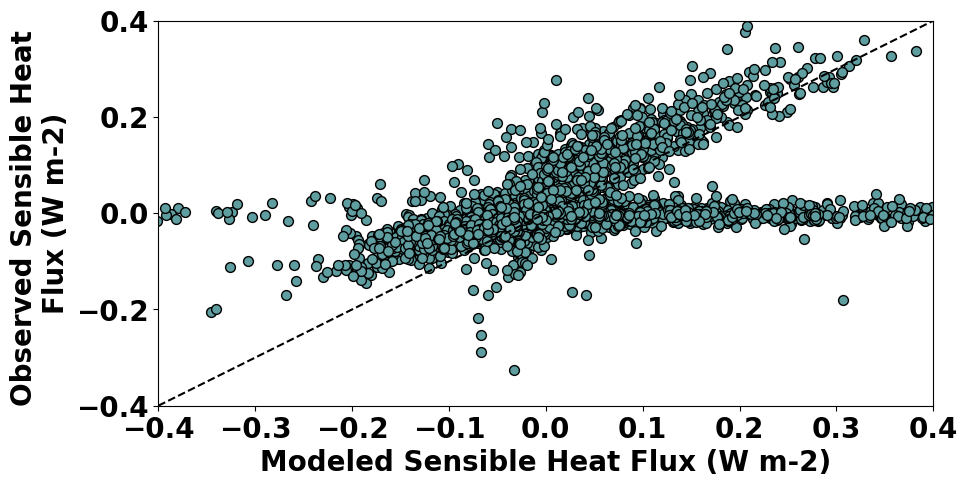

In [133]:
fig, ax = plt.subplots(figsize=(10, 5))

# ax.plot(sos_dataset['time'], sos_dataset['H_s'], label='Observed')
ax.scatter(H_s_modeled, sos_dataset['w_tc__3m_c'], color='cadetblue', ec='black', s=50)
ax.plot([-0.4, 0.4], [-0.4, 0.4], color='black', linestyle='--')

ax.set_xlabel('Modeled Sensible Heat Flux (W m-2)')
ax.set_ylabel('Observed Sensible Heat \nFlux (W m-2)')
ax.set_xlim(-0.4, 0.4)
ax.set_ylim(-0.4, 0.4)

The model does not perform very well when representing positive values. It is low biased for positive values. It performs somewhat better for negative sensible heat flux values although it is still not perfect. (before modifying z_0)

### Problem 2

Create a scatter plot of measured latent heat flux (`w_h2o__3m_c`) versus modeled latent heat flux from the entire season (modeled on the x axis, measured on the y axis). Briefly describe the performance of the model. Keep your measurements in their native units (g/m^2/s)

$H_L = -L_v C_E u_h (q_h - q_s)$


`C_E` is atmospheric conductivity

In [134]:
L_v = 225 # J g-1
q_h = sos_dataset['mixingratio_3m_c']
q_s = sos_dataset['Tsurfmixingratio_c']
C_e = C_h

H_l_modeled = -L_v * C_e * u_h * (q_h-q_s)

(-0.2, 0.2)

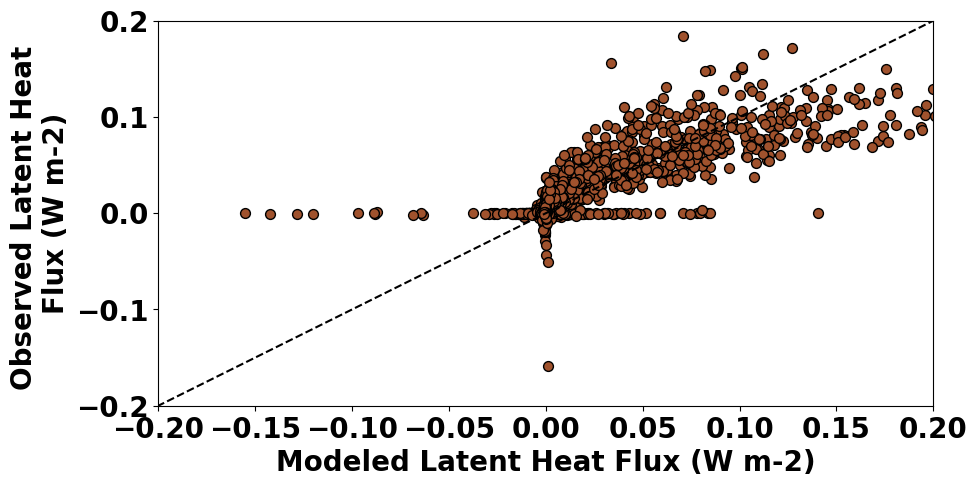

In [135]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.scatter(H_l_modeled, sos_dataset['w_h2o__3m_c'], color='sienna', ec='black', s=50)
ax.plot([-0.4, 0.4], [-0.4, 0.4], color='black', linestyle='--')

ax.set_xlabel('Modeled Latent Heat Flux (W m-2)')
ax.set_ylabel('Observed Latent Heat \nFlux (W m-2)')
ax.set_xlim(-0.2, 0.2)
ax.set_ylim(-0.2, 0.2)

(Before changing z_0) The modeled latent heat flux does an okay job at estimating values relative to observations. Like the sensible heat flux above, the modeled fluxes are low biased compared to observations.

### Problem 3

Modify the z0 value until your fit improves. Write the final z0 value you settled on. How does it differ from the z0 value that I suggested above (0.0002)?

#### Answer
The final z_0 value I used was 0.005m which is more than an order of magnitude larger than the suggested value. 0.005m or 5mm is likely not the most realistic however as most snow grains are the in the range of 0.3-1mm excluding depth hoar, surface hoar, and certain precipitation types.

### Problem 4

Plot time series of modeled and measured sensible heat flux and latent heat flux for the first 4 days of January. Create a similar plot for the first 4 days of June. Describe why you think the performance is better in one month versus the other.

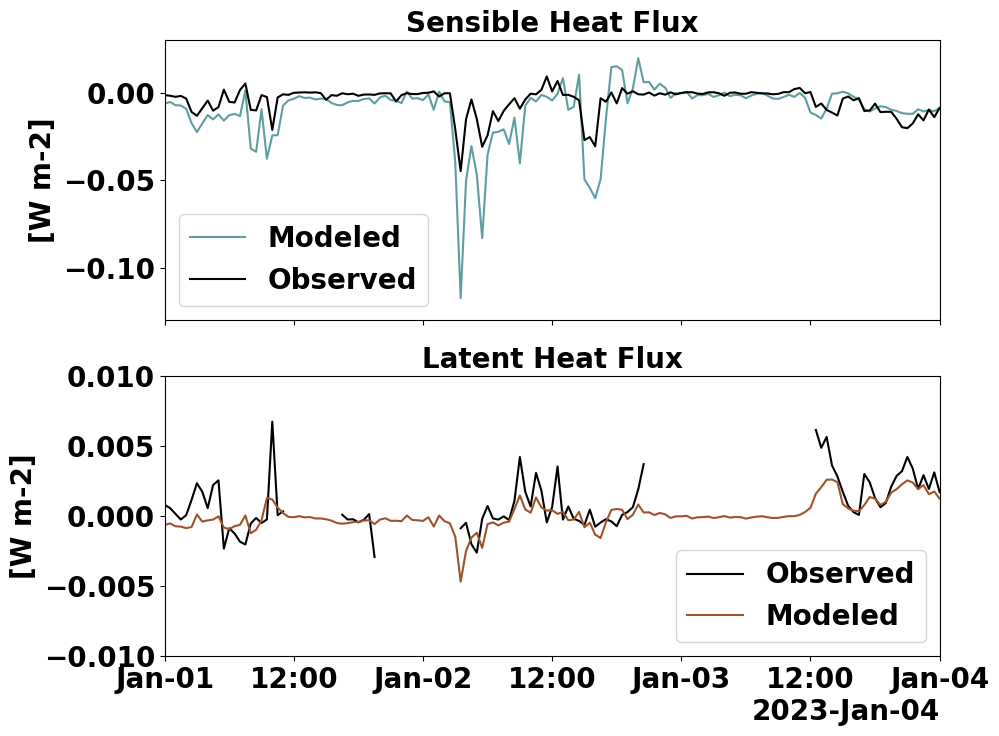

In [136]:
fig, ax = plt.subplots(2,1,figsize=(10, 8), sharex=True)

# ax[0].plot(sos_dataset['time'], sos_dataset['H_s'], label='Observed')
H_s_modeled.plot(ax=ax[0], label='Modeled', color='cadetblue')
sos_dataset['w_tc__3m_c'].plot(ax=ax[0], label='Observed', color='black')
ax[0].set_ylabel('[W m-2]')
ax[0].set_ylim(-0.13, 0.03)
ax[0].set_title('Sensible Heat Flux')
ax[0].set_xlabel('')
ax[0].legend()

sos_dataset['w_h2o__3m_c'].plot(ax=ax[1], label='Observed', color='black')
H_l_modeled.plot(ax=ax[1], label='Modeled', color='sienna')
ax[1].set_ylabel('[W m-2]')
ax[1].set_title('Latent Heat Flux')
ax[1].set_ylim(-0.01, 0.01)
ax[1].set_xlim(pd.to_datetime('2023-01-01'), pd.to_datetime('2023-01-04'))
ax[1].set_xlabel('')
ax[1].legend()



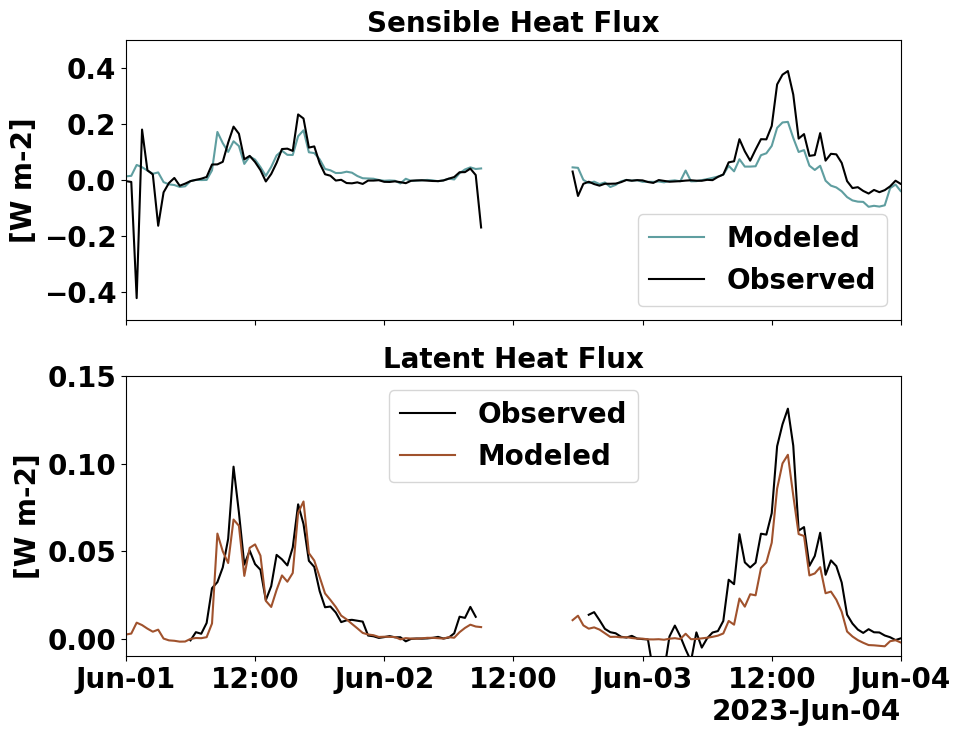

In [137]:
fig, ax = plt.subplots(2,1,figsize=(10, 8), sharex=True)

# ax[0].plot(sos_dataset['time'], sos_dataset['H_s'], label='Observed')
H_s_modeled.plot(ax=ax[0], label='Modeled', color='cadetblue')
sos_dataset['w_tc__3m_c'].plot(ax=ax[0], label='Observed', color='black')
ax[0].set_ylabel('[W m-2]')
ax[0].set_ylim(-0.5, 0.5)
ax[0].set_title('Sensible Heat Flux')
ax[0].set_xlabel('')
ax[0].legend()

sos_dataset['w_h2o__3m_c'].plot(ax=ax[1], label='Observed', color='black')
H_l_modeled.plot(ax=ax[1], label='Modeled', color='sienna')
ax[1].set_ylabel('[W m-2]')
ax[1].set_title('Latent Heat Flux')
ax[1].set_ylim(-0.01, 0.15)
ax[1].set_xlim(pd.to_datetime('2023-06-01'), pd.to_datetime('2023-06-04'))
ax[1].set_xlabel('')
ax[1].legend()

#### Answer

In general, it appears that the modeled fluxes match observations better in June. The lack of snow on the ground likely improves these flux estimates as the near surface temperature lapse rates are less dramatic without snow. In January, intense lapse rates near the surface on clear, less windy days can reduce the quality of our modeled fluxes by adding complexity to our temperature gradient estimates. In June, the lapse rates are not as high of magnitude and the temperature gradients are thus more predictable and reliable to use in our flux equations.

### Problem 5

Take all of your measured and predicted/modeled values from the season, and create two separate datasets, one that includes data from a) between 10pm and 2am, and b) between 11am and 3pm. Create scatterplots of modeled versus measured sensible heat and latent heat fluxes (like in problems 1 and 2) for the two separate datasets (as in problems 1 and 2).


In [138]:
# separate the data to only include between 10pm and 2am
H_s_modeled_night = H_s_modeled.where((H_s_modeled['time.hour'] >= 22) | (H_s_modeled['time.hour'] <= 2), drop=True)
H_s_observed_night = sos_dataset['w_tc__3m_c'].where((sos_dataset['w_tc__3m_c']['time.hour'] >= 22) | (sos_dataset['w_tc__3m_c']['time.hour'] <= 2), drop=True)
H_l_modeled_night = H_l_modeled.where((H_l_modeled['time.hour'] >= 22) | (H_l_modeled['time.hour'] <= 2), drop=True)
H_l_observed_night = sos_dataset['w_h2o__3m_c'].where((sos_dataset['w_h2o__3m_c']['time.hour'] >= 22) | (sos_dataset['w_h2o__3m_c']['time.hour'] <= 2), drop=True)

# separate the data to only include between 11am and 3pm
H_s_modeled_day = H_s_modeled.where((H_s_modeled['time.hour'] >= 11) & (H_s_modeled['time.hour'] <= 15), drop=True)
H_s_observed_day = sos_dataset['w_tc__3m_c'].where((sos_dataset['w_tc__3m_c']['time.hour'] >= 11) & (sos_dataset['w_tc__3m_c']['time.hour'] <= 15), drop=True)
H_l_modeled_day = H_l_modeled.where((H_l_modeled['time.hour'] >= 11) & (H_l_modeled['time.hour'] <= 15), drop=True)
H_l_observed_day = sos_dataset['w_h2o__3m_c'].where((sos_dataset['w_h2o__3m_c']['time.hour'] >= 11) & (sos_dataset['w_h2o__3m_c']['time.hour'] <= 15), drop=True)


(-0.2, 0.2)

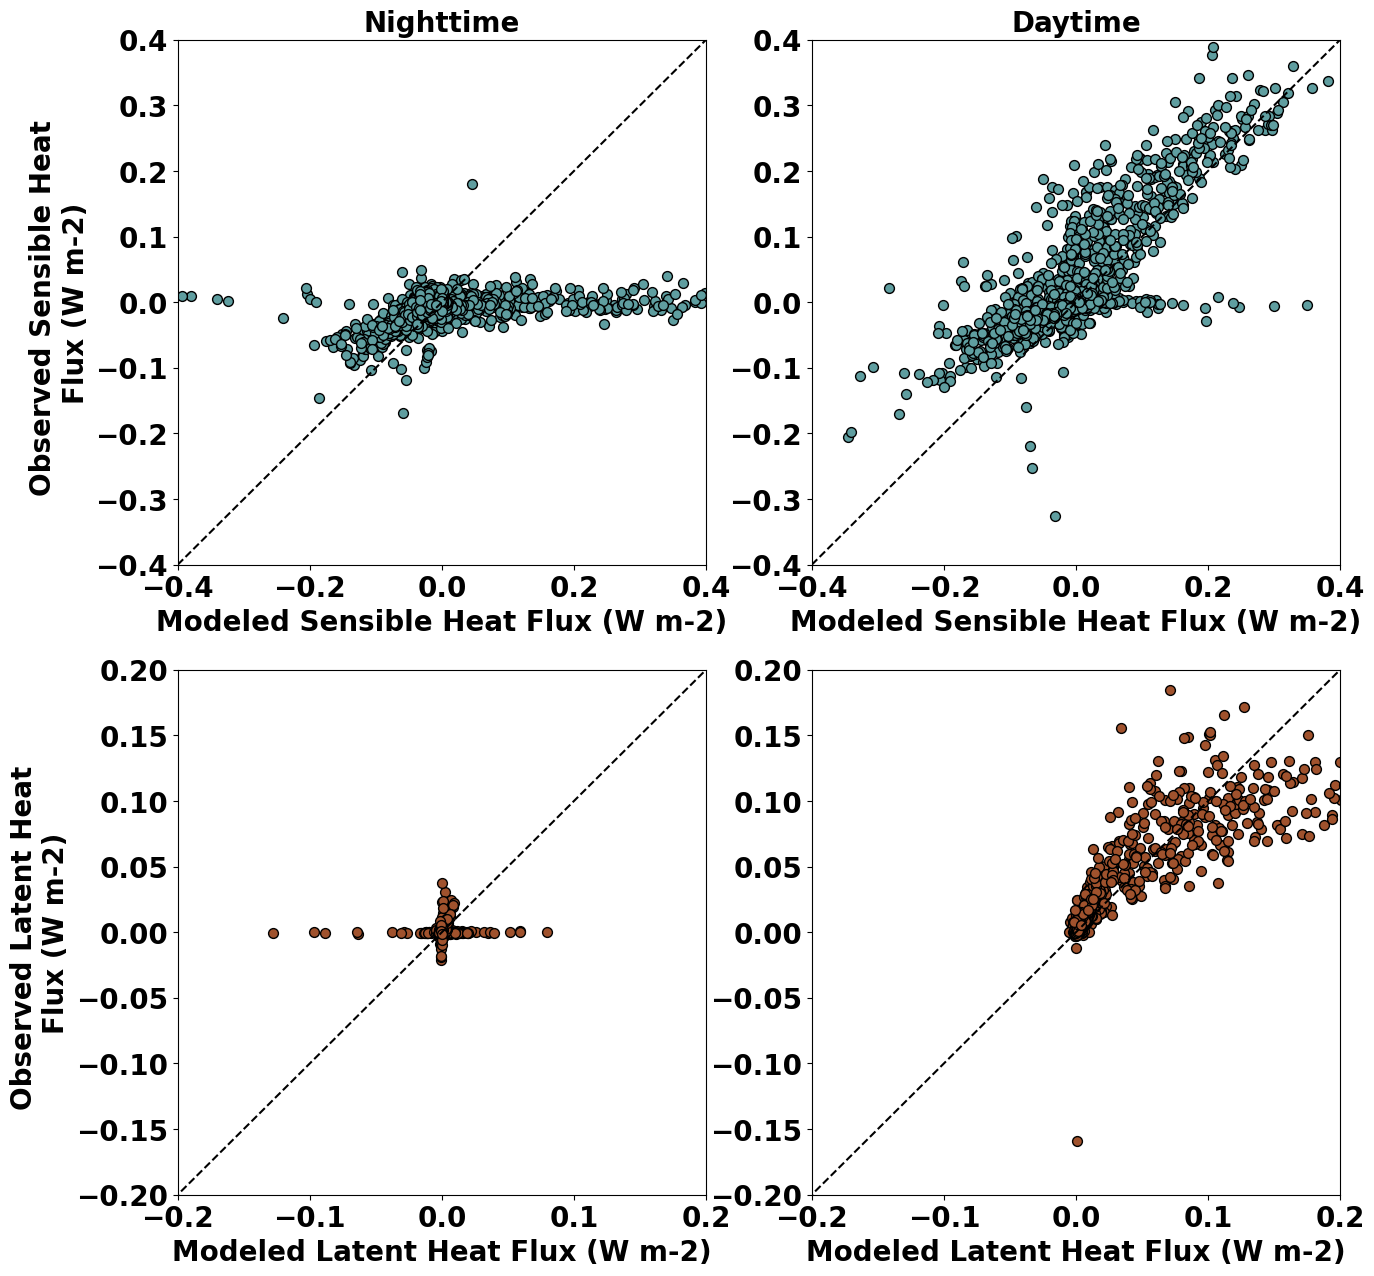

In [139]:
fig, ax = plt.subplots(2,2,figsize=(15, 15))

ax[0,0].scatter(H_s_modeled_night, H_s_observed_night, color='cadetblue', ec='black', s=50)
ax[0,0].plot([-0.4, 0.4], [-0.4, 0.4], color='black', linestyle='--')
ax[0,0].set_xlabel('Modeled Sensible Heat Flux (W m-2)')
ax[0,0].set_ylabel('Observed Sensible Heat \nFlux (W m-2)')
ax[0,0].set_xlim(-0.4, 0.4)
ax[0,0].set_ylim(-0.4, 0.4)
ax[0,0].set_title('Nighttime')

ax[0,1].scatter(H_s_modeled_day, H_s_observed_day, color='cadetblue', ec='black', s=50)
ax[0,1].plot([-0.4, 0.4], [-0.4, 0.4], color='black', linestyle='--')
ax[0,1].set_xlabel('Modeled Sensible Heat Flux (W m-2)')
# ax[0,1].set_ylabel('Observed Sensible Heat \nFlux (W m-2)')
ax[0,1].set_xlim(-0.4, 0.4)
ax[0,1].set_ylim(-0.4, 0.4)
ax[0,1].set_title('Daytime')

ax[1,0].scatter(H_l_modeled_night, H_l_observed_night, color='sienna', ec='black', s=50)
ax[1,0].plot([-0.4, 0.4], [-0.4, 0.4], color='black', linestyle='--')
ax[1,0].set_xlabel('Modeled Latent Heat Flux (W m-2)')
ax[1,0].set_ylabel('Observed Latent Heat \nFlux (W m-2)')
ax[1,0].set_xlim(-0.2, 0.2)
ax[1,0].set_ylim(-0.2, 0.2)

ax[1,1].scatter(H_l_modeled_day, H_l_observed_day, color='sienna', ec='black', s=50)
ax[1,1].plot([-0.4, 0.4], [-0.4, 0.4], color='black', linestyle='--')
ax[1,1].set_xlabel('Modeled Latent Heat Flux (W m-2)')
# ax[1,1].set_ylabel('Observed Latent Heat \nFlux (W m-2)')
ax[1,1].set_xlim(-0.2, 0.2)
ax[1,1].set_ylim(-0.2, 0.2)


### Problem 6

Explain why you think the performance differs between the two time periods (night versus day).

#### Answer
The performance of the modeled fluxes is much better during the mid day period than at night. The lapse rate of the boundary layer right at the snow surface is likely the reason for this. During the middle of the day on sunny days, the boundary layer is better mixed than at night and thus the temperature difference between 3m and the surface might represent a somewhat linear lapse rate. At night, the surface inversion is much stronger and the layer of the atmosphere right at the snow surface is quite disconnected from the atmosphere above, limiting the ability of our modeled fluxes to represent reality.

### Problem 7

Using data from the whole season, create a time series plot of cumulative sublimation with two lines, one using measured values and one using modeled values. Describe how the measured and modeled total sublimation differs. Note that latent heat flux is approximately equal to the sublimation rate. Latent heat flux, in units of g/m^2/s, when summed over the season, should be converted to g/m^2. That means you need to multiply each time step by the number of seconds in that timestep, to convert the latent heat flux (aka sublimation rate) into a total amount of water sublimated. So a 30-minute flux (units g/m^2/s) is multipled by 1800s (number of seconds in 30 minutes), to produce a measure of "total sublimation in this 30-minute period", in units g/m^2.

Text(0, 0.5, 'Snow Depth [m]')

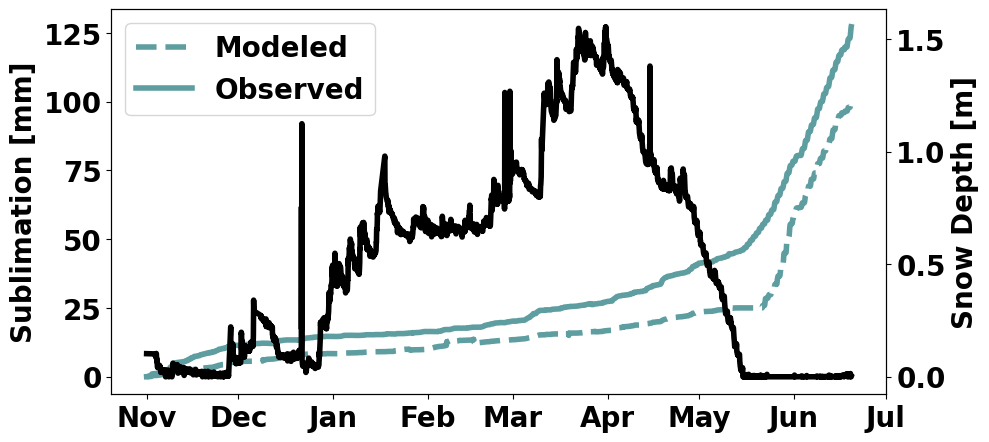

In [144]:
sublim_modeled = H_l_modeled.cumsum()*1800/1000 # convert to mm water
sublim_observed = sos_dataset['w_h2o__3m_c'].cumsum()*1800/1000 # convert to mm water

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(sublim_modeled['time'], sublim_modeled, label='Modeled', color='cadetblue', ls='--', lw=4)
ax.plot(sublim_observed['time'], sublim_observed, label='Observed', color='cadetblue', lw=4)

# Set the x-axis major formatter to show only the month
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# Optionally, you can set the major locator to show ticks for each month
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.set_ylabel('Sublimation [mm]')
ax.legend()

ax2 = ax.twinx()
ax2.plot(sos_dataset['time'], sos_dataset['SnowDepth_c'], color='k', lw=4)
ax2.set_ylabel('Snow Depth [m]')


#### Answer
Over the course of the season, observed sublimation was slightly higher than modeled sublimation. This gap widened more in the spring with even more sublimation in the observed data. "Sublimation" increases a lot in mid-May although after plotting snow depth, we see that this increase in latent heat flux corresponds well with the loss of snow cover.